<a href="https://www.kaggle.com/code/awesomeharris/ps3e17-basic-eda?scriptVersionId=133378441" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Getting started

In [2]:
path1 = "/kaggle/input/playground-series-s3e17/"
#path2 = "/kaggle/input//"

sample = pd.read_csv(path1+"sample_submission.csv")
train = pd.read_csv(path1+"train.csv")
test = pd.read_csv(path1+"test.csv")
#extra = pd.read_csv(path2+"synthetic_data.csv")

# Combine playground dataset and synthetic dataset generated
#train = pd.concat([train,extra]).reset_index(drop=True).drop_duplicates()

id_test = test['id'] # id column required for submission file
target = 'Machine failure'

display(train.shape),display(test.shape)
display(train.head()), display(test.head())
display(train.describe().T), display(test.describe().T)

(136429, 14)

(90954, 13)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


,count,mean,std,min,25%,50%,75%,max
id,136429.0,68214.000000,39383.804275,0.0,34107.0,68214.0,102321.0,136428.0
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0


,count,mean,std,min,25%,50%,75%,max
id,90954.0,181905.500000,26256.302529,136429.0,159167.25,181905.5,204643.75,227382.0
Air temperature [K],90954.0,299.859493,1.857562,295.3,298.30,300.0,301.20,304.4
Process temperature [K],90954.0,309.939375,1.385296,305.7,308.70,310.0,310.90,313.8
Rotational speed [rpm],90954.0,1520.528179,139.970419,1168.0,1432.00,1493.0,1579.00,2886.0
Torque [Nm],90954.0,40.335191,8.504683,3.8,34.60,40.5,46.20,76.6
Tool wear [min],90954.0,104.293962,63.871092,0.0,48.00,106.0,158.00,253.0
TWF,90954.0,0.001473,0.038355,0.0,0.00,0.0,0.00,1.0
HDF,90954.0,0.005343,0.072903,0.0,0.00,0.0,0.00,1.0
PWF,90954.0,0.002353,0.048449,0.0,0.00,0.0,0.00,1.0
OSF,90954.0,0.003870,0.062090,0.0,0.00,0.0,0.00,1.0


(None, None)

In [3]:
train.info(),print("\n"),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

(None, None, None)

In [4]:
train.Type.unique(), test.Type.unique()

(array(['L', 'M', 'H'], dtype=object), array(['L', 'M', 'H'], dtype=object))

In [5]:
# checkpoint 1
# drop "id" and "Product ID" columns in train and test datasets
train1 = train.drop(columns=['id','Product ID'],axis=1)
test1 = test.drop(columns=['id','Product ID'],axis=1)
display(train1.head(3)), display(test1.head(3))

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,L,301.3,310.4,1525,37.7,96,0,0,0,0,0


(None, None)

# Exploring the data

## First look at target "Machine failure" distribution

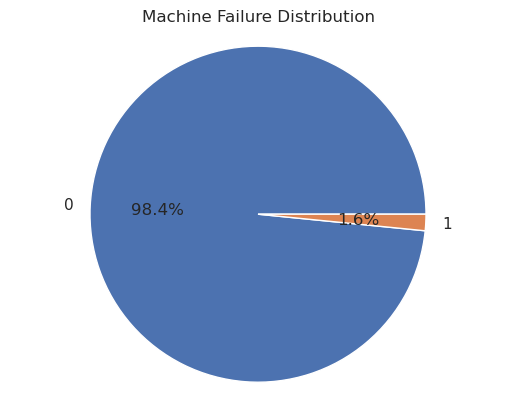

In [6]:
# Count the occurrences of each failure type
failure_counts = train1['Machine failure'].value_counts()

# Create a pie chart
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%')
plt.title('Machine Failure Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the chart
plt.show()

In [7]:
failure_counts

0    134281
1      2148
Name: Machine failure, dtype: int64

It can be observed that the target is highly imbalanced.

## 1. Column "Type"

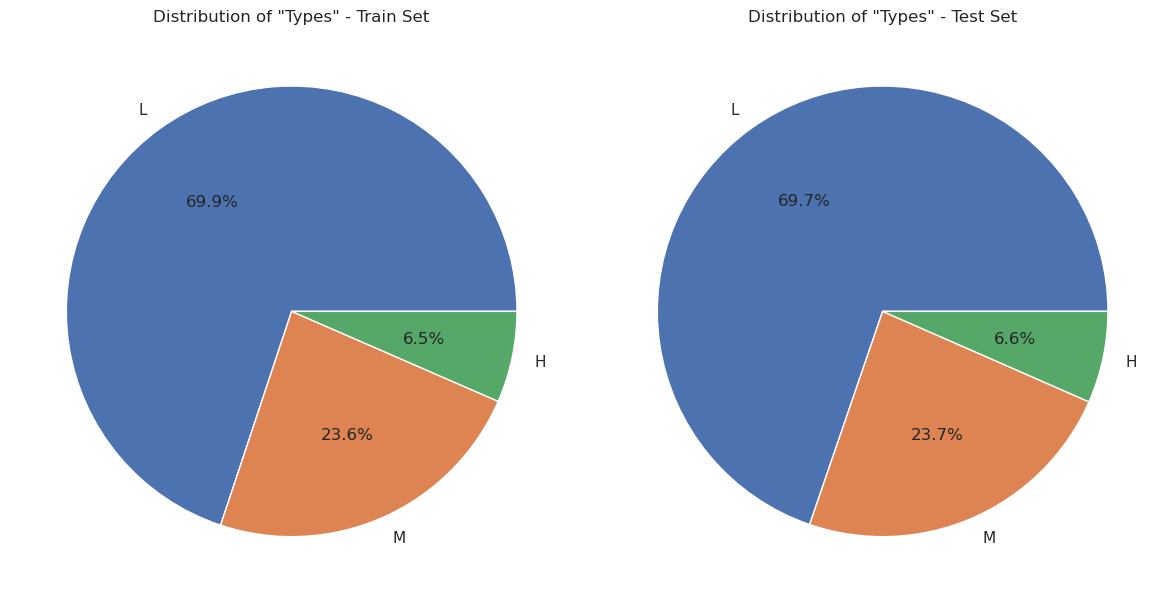

In [8]:
type_counts1 = train1['Type'].value_counts()
type_counts2 = test1['Type'].value_counts()

# Create subplots for side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

# Plotting the first pie chart
axes[0].pie(type_counts1, labels=type_counts1.index, autopct='%1.1f%%')
axes[0].set_title('Distribution of "Types" - Train Set')

# Plotting the second pie chart
axes[1].pie(type_counts2, labels=type_counts2.index, autopct='%1.1f%%')
axes[1].set_title('Distribution of "Types" - Test Set')

# Adjust spacing between subplots
plt.tight_layout()

# Display the charts
plt.show()

## 2. Column "Air temperature [K]"

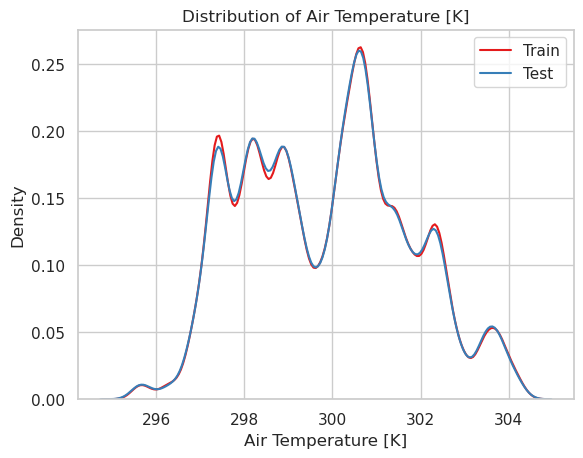

In [9]:
sns.set_style('whitegrid')  # Optional: Set the style of the plot
sns.set_palette('Set1')

# Plotting KDE plots for the "Air temperature [K]" column from both datasets
sns.kdeplot(data=train1['Air temperature [K]'], label='Train')
sns.kdeplot(data=test1['Air temperature [K]'], label='Test')

# Adding labels and title
plt.xlabel('Air Temperature [K]')
plt.ylabel('Density')
plt.title('Distribution of Air Temperature [K]')

# Displaying the plot
plt.legend()
plt.show()

## 3. Column "Process temperature [K]"

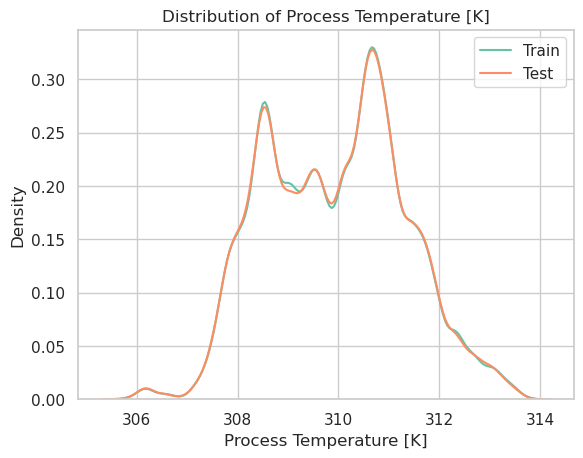

In [10]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

# Plotting KDE plots for the "Process temperature [K]" column from both datasets
sns.kdeplot(data=train1['Process temperature [K]'], label='Train')
sns.kdeplot(data=test1['Process temperature [K]'], label='Test')

# Adding labels and title
plt.xlabel('Process Temperature [K]')
plt.ylabel('Density')
plt.title('Distribution of Process Temperature [K]')

# Displaying the plot
plt.legend()
plt.show()

## 4. Column "Rotational speed [rpm]"

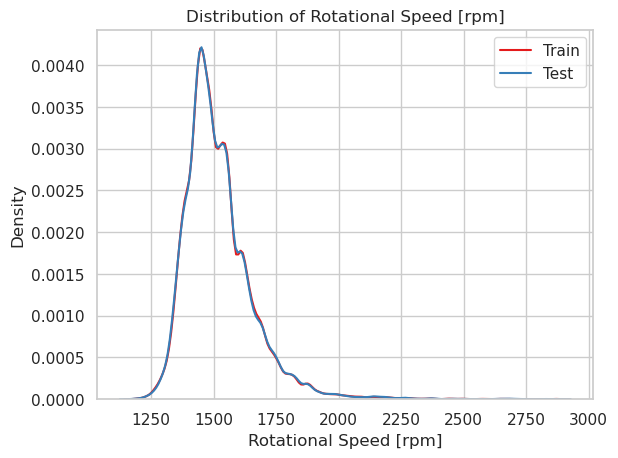

In [11]:
sns.set_style('whitegrid')
sns.set_palette('Set1')

# Plotting KDE plots for the "Rotational speed [rpm]" column from both datasets
sns.kdeplot(data=train1['Rotational speed [rpm]'], label='Train')
sns.kdeplot(data=test1['Rotational speed [rpm]'], label='Test')

# Adding labels and title
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Density')
plt.title('Distribution of Rotational Speed [rpm]')

# Displaying the plot
plt.legend()
plt.show()

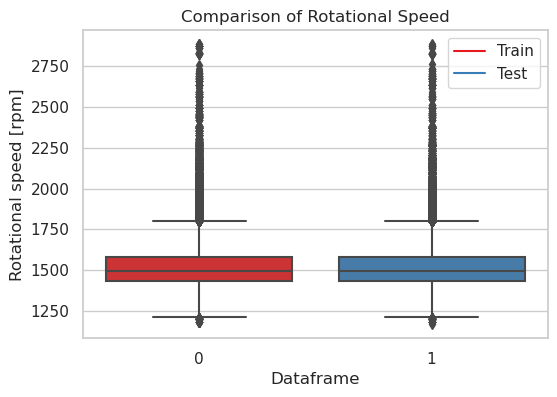

In [12]:
data1 = train1['Rotational speed [rpm]']
data2 = test1['Rotational speed [rpm]']

# Creating a list of labels for the boxplot legend
legend_labels = ['Train', 'Test']

# Creating a boxplot with combined data
plt.figure(figsize=(6, 4))
sns.boxplot(data=[data1, data2])

# Adding labels and title
plt.xlabel('Dataframe')
plt.ylabel('Rotational speed [rpm]')
plt.title('Comparison of Rotational Speed')

# Creating a custom legend using a loop
legend_handles = []
for i, label in enumerate(legend_labels):
    legend_handles.append(plt.Line2D([], [], color=sns.color_palette()[i], label=label))
    
# Adding the legend to the plot
plt.legend(handles=legend_handles)

# Displaying the plot
plt.show()

There are many outliers in this feature. To have a balanced distribution, it is recommended here to limit the upper limit to 2000 rpm. The outlier points above 2000 rpm are reassigned to a mean value as suggested by @AYUSHS9020.

In [13]:
# Checkpoint 2
train2 = train1.copy()
test2 = test1.copy()
train2["Rotational speed [rpm]"] = np.where(train2["Rotational speed [rpm]"] > 2000 , train2["Rotational speed [rpm]"].mean() , train2["Rotational speed [rpm]"])
test2["Rotational speed [rpm]"] = np.where(test2["Rotational speed [rpm]"] > 2000 , test2["Rotational speed [rpm]"].mean() , test2["Rotational speed [rpm]"])

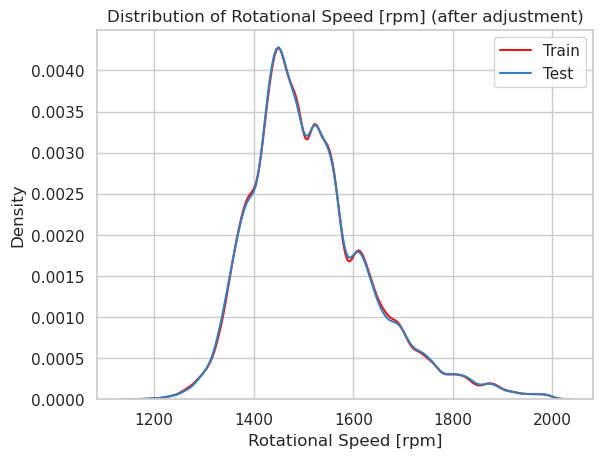

In [14]:
sns.set_style('whitegrid')
sns.set_palette('Set1')

# Plotting KDE plots for the "Rotational speed [rpm]" column from both datasets
sns.kdeplot(data=train2['Rotational speed [rpm]'], label='Train')
sns.kdeplot(data=test2['Rotational speed [rpm]'], label='Test')

# Adding labels and title
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Density')
plt.title('Distribution of Rotational Speed [rpm] (after adjustment)')

# Displaying the plot
plt.legend()
plt.show()

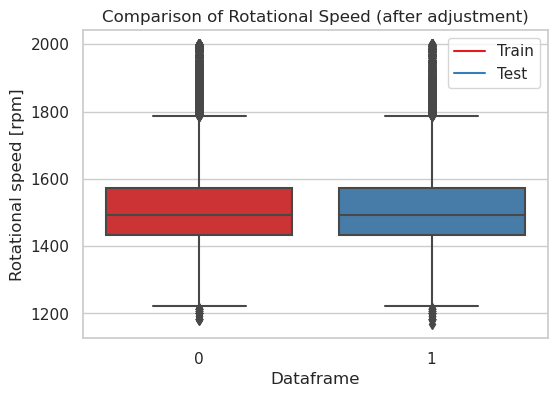

In [15]:
data1 = train2['Rotational speed [rpm]']
data2 = test2['Rotational speed [rpm]']

# Creating a list of labels for the boxplot legend
legend_labels = ['Train', 'Test']

# Creating a boxplot with combined data
plt.figure(figsize=(6, 4))
sns.boxplot(data=[data1, data2])

# Adding labels and title
plt.xlabel('Dataframe')
plt.ylabel('Rotational speed [rpm]')
plt.title('Comparison of Rotational Speed (after adjustment)')

# Creating a custom legend using a loop
legend_handles = []
for i, label in enumerate(legend_labels):
    legend_handles.append(plt.Line2D([], [], color=sns.color_palette()[i], label=label))
    
# Adding the legend to the plot
plt.legend(handles=legend_handles)

# Displaying the plot
plt.show()

## 5. Column "Tool wear [min]"

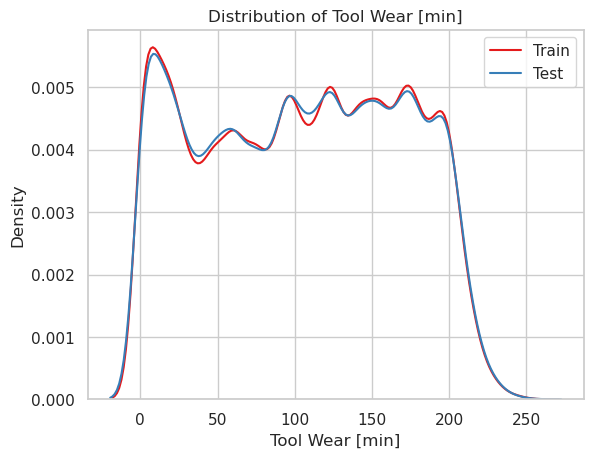

In [16]:
sns.set_style('whitegrid')
sns.set_palette('Set1')

# Plotting KDE plots for the "Tool wear [min]" column from both datasets
sns.kdeplot(data=train2['Tool wear [min]'], label='Train')
sns.kdeplot(data=test2['Tool wear [min]'], label='Test')

# Adding labels and title
plt.xlabel('Tool Wear [min]')
plt.ylabel('Density')
plt.title('Distribution of Tool Wear [min]')

# Displaying the plot
plt.legend()
plt.show()

## 6. Columns "TWF", "HDF", "PWF", "OSF" and "RNF"

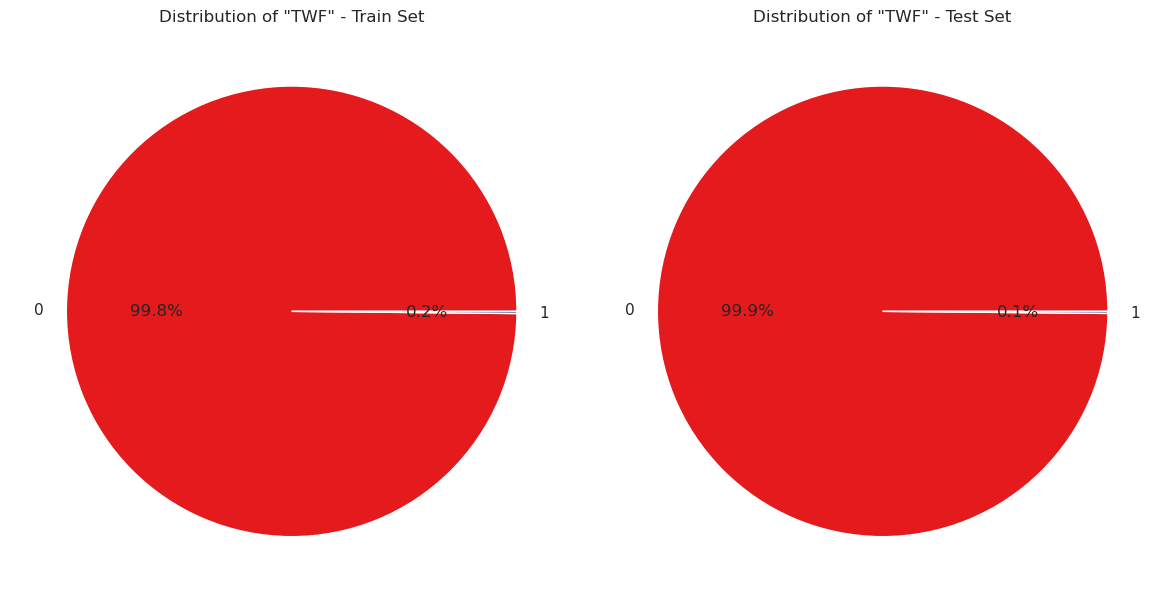

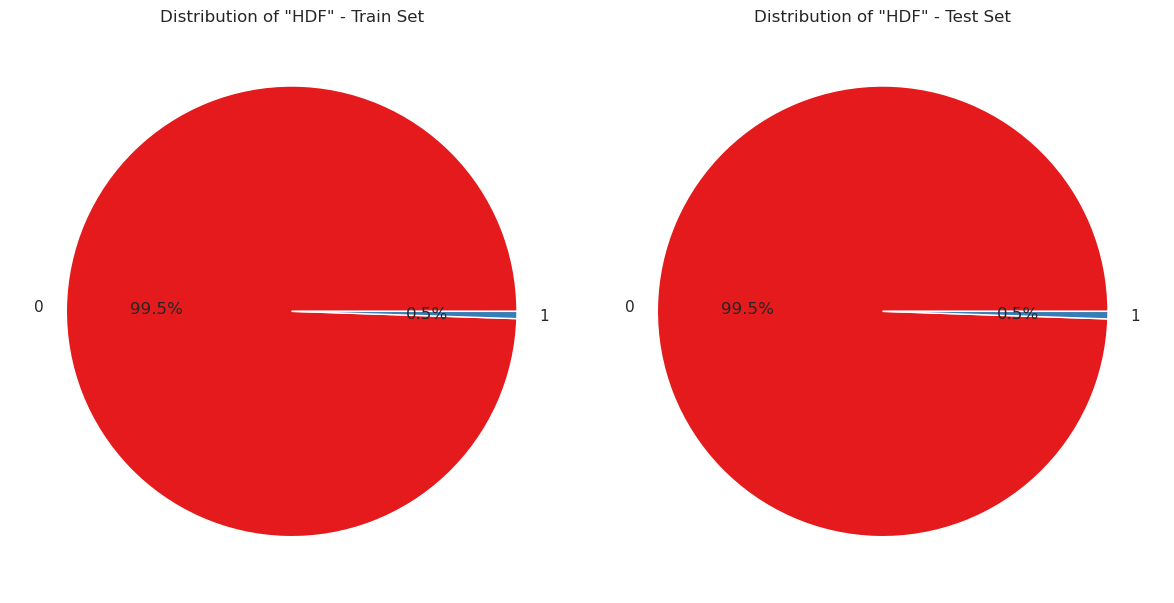

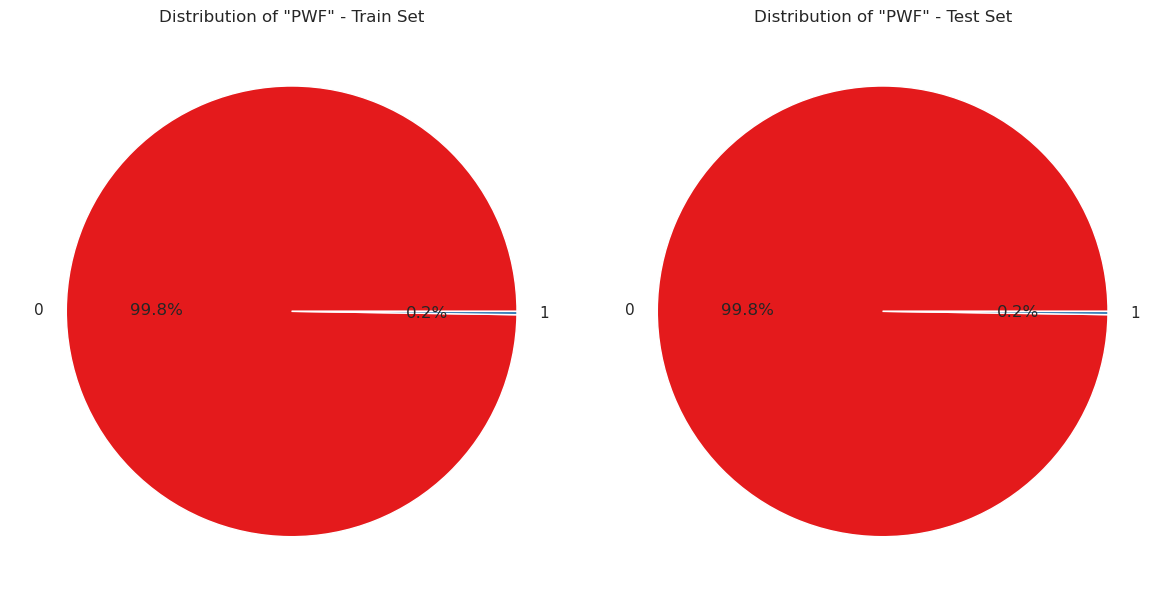

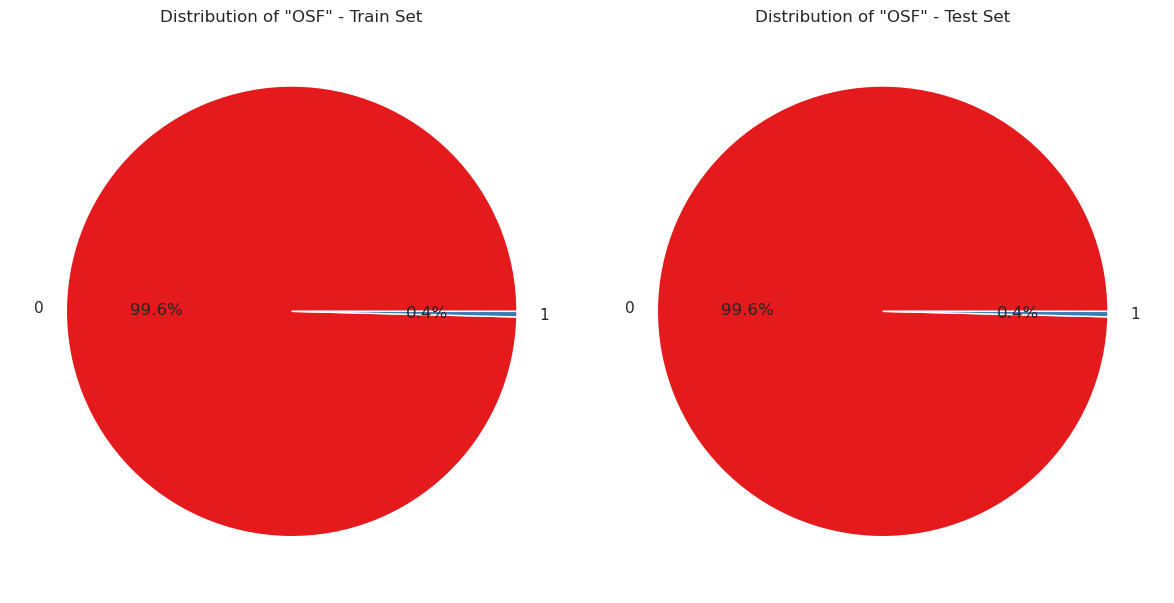

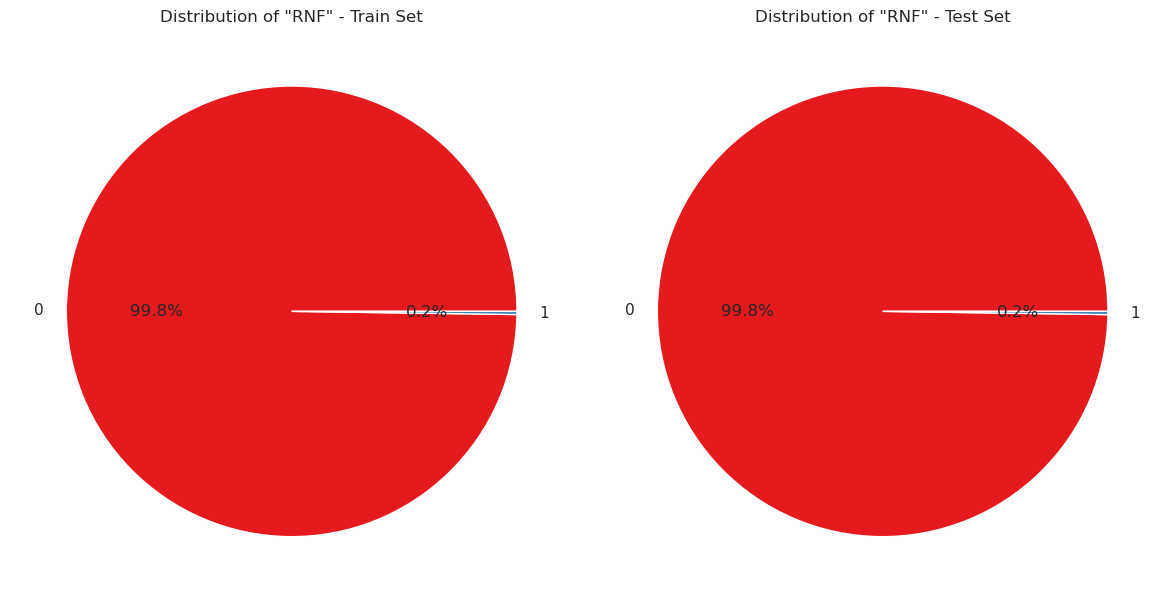

In [17]:
binary_features = ["TWF", "HDF", "PWF", "OSF", "RNF"]
for x in binary_features:
    counts1 = train2[x].value_counts()
    counts2 = test2[x].value_counts()

    # Create subplots for side-by-side pie charts
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plotting the first pie chart
    axes[0].pie(counts1, labels=counts1.index, autopct='%1.1f%%')
    axes[0].set_title(f'Distribution of "{x}" - Train Set')

    # Plotting the second pie chart
    axes[1].pie(counts2, labels=counts2.index, autopct='%1.1f%%')
    axes[1].set_title(f'Distribution of "{x}" - Test Set')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the charts
    plt.show()

It can be observed that the five binary features are highly imbalanced.

# Correlation Heatmap

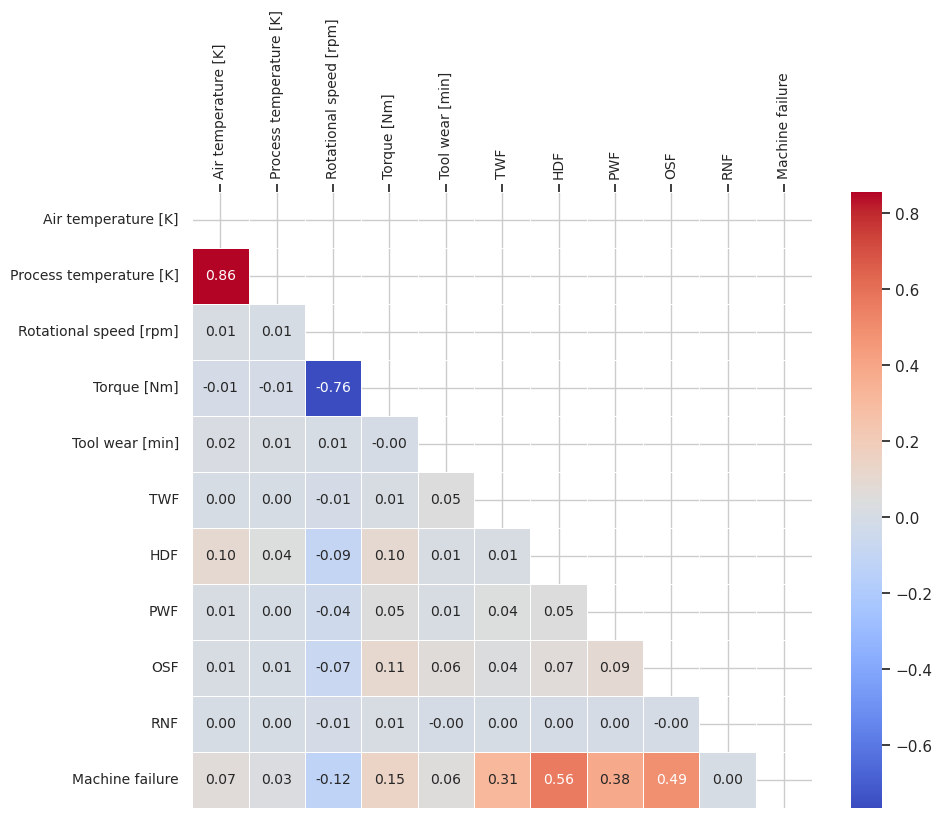

In [18]:
new_col_order = ['Type', 'Air temperature [K]', 'Process temperature [K]', \
                 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', \
                 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure']
df = train2.reindex(columns = new_col_order)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a mask to hide the upper triangular portion
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure size
plt.figure(figsize=(10, 8))

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', \
            fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# Adjust the font size of the annotations
plt.tick_params(axis='both', which='both', labelsize=10)

# Change x-axis legend position to top
plt.gca().xaxis.set_ticks_position('top')
plt.xticks(rotation=90)

# Display the heatmap
plt.show()

# Key takeaways
- Highly imbalanced target distribution in train dataset with majority of failed testings.
- Only one categorical feature here namely "Type" which is fairly imbalanced.
- All numerical features are quite balanced except "Rotational speed [rpm]".
- All binary features are highly imbalanced, where majority is labeled as "0".
- The feature distributions in train and test datasets are fairly comparable.
- Fairly high collinearity is found between the Process Temperature and Air Temperature features.
- Fairly high collinearity is found between the Rotational Speed and Torque features.
- New features such as "Temperature Ratio" = "Process Temperature" / "Air Temperature" and "Power" = "Rotational Speed" * "Torque" can be included as part of feature engineering.

# Next versions EDA
- Try to analyze the data distribution by stratifying the binary target.
- Try to analyze the data distribution by stratifying the "Type" feature.
- Try to analyze the data distribution by stratifying the "Type" feature and binary target together.